"Finding hourly Ambient temperature variation"

In [1]:
import math as m
def ambient_Temp(LST):
    "For month of April"
    "If local time between 500 hrs to 1400hrs "
    "Coldest hour = 5 AM morning & Hottest hour 3 PM afternoon"
    tmin = 5         # coolest ambient temp time
    tmax = 15        # hottest ambient temp time
    T_max1 = 39      # Maximum Temp on 21st April
    T_min1 = 26      # Minimum Temp on 21st April
    T_min2 = 26      # Minimum Temp on 22nd April
    t = LST-5
    if (0<=t) and (t<=9):
        T = ((T_max1 -T_min1)/2)*m.tanh((t-4.5)/2.5) + (T_max1+T_min1)/2
        return(T)
    elif (9<t) and (t<=23):
        "If local time between 1500hrs to 500 hrs"
        T = -((T_max1-T_min2)/2)*m.tanh((t-16.5)/3.5) + (T_max1+T_min2)/2
        return (T)
    elif (t == -5) or (t == -4) or (t == -3) or (t == -2) or (t == -1):
        T = ((T_max1 -T_min1)/2)*m.tanh((t-4.5)/2.5) + (T_max1+T_min1)/2
        return(T)


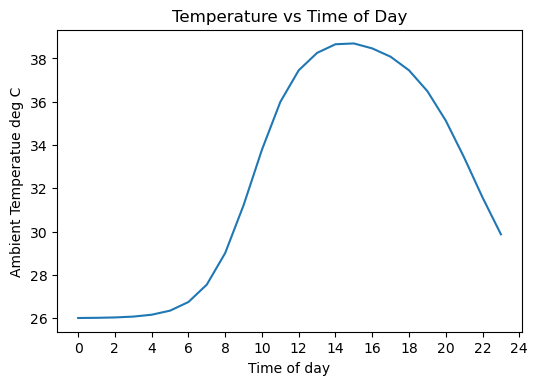

In [2]:
import matplotlib.pyplot as plt
import numpy as np

T_amb = []
Time = []
for i in range (0,24,1):
    Time.append(i)
    dbt = ambient_Temp(i)
    T_amb.append(dbt)
plt.figure(dpi=100)
plt.plot(Time,T_amb)
plt.xlabel("Time of day")
plt.ylabel("Ambient Temperatue deg C")
plt.title("Temperature vs Time of Day")
plt.locator_params(axis='x', nbins=25)
#plt.xticks(np.arange(0,25,1))
plt.show()

In [3]:
"Temperature values at every hour on 21st April"
Time_array = np.array(Time)
T_amb_array = np.array(T_amb)
np.set_printoptions(precision = 2)
T_amb_array = T_amb_array.reshape(len(T_amb_array),1)
Time_array = Time_array.reshape(len(Time_array),1)
print(np.concatenate((Time_array, T_amb_array),1)) #reshape(len(Time),1)

[[ 0.   26.01]
 [ 1.   26.01]
 [ 2.   26.03]
 [ 3.   26.07]
 [ 4.   26.16]
 [ 5.   26.35]
 [ 6.   26.75]
 [ 7.   27.55]
 [ 8.   29.01]
 [ 9.   31.22]
 [10.   33.78]
 [11.   35.99]
 [12.   37.45]
 [13.   38.25]
 [14.   38.65]
 [15.   38.69]
 [16.   38.46]
 [17.   38.08]
 [18.   37.45]
 [19.   36.49]
 [20.   35.13]
 [21.   33.42]
 [22.   31.58]
 [23.   29.87]]


In [4]:
"A user defined function which will be used later on "

def wall_thermal_resistance (Length_1,Length_2,Length_3,Area, thermal_cndty_1, thermal_cndty_2, thermal_cndty_3):
    r_1 = (Length_1/100)/(thermal_cndty_1*Area)  # [K/W] "external plaster resistance"
    r_2 = (Length_2/100)/(thermal_cndty_2*Area)  # [K/W] "brickwall resistance"
    r_3 = (Length_3/100)/(thermal_cndty_3*Area)  # [K/W] "internal plaster resistance"
    r_equivalent = r_1 + r_2 + r_3               # resistance in series
    return r_equivalent

In [5]:
"A user defined function which will be used later on "

def load_through_wall (T_ext , T_int, thermal_resistance):
    delta_Temp = T_ext - T_int                   # [K]"Ambient temperature - Internal temperature"
    Q_wall = (delta_Temp/thermal_resistance)/1000       # [kW]
    return Q_wall

In [6]:
"A user defined function which will be used later on "

def room_load (Q_ext_wall_1, Q_ext_wall_2):
    Q_room = Q_ext_wall_1 + Q_ext_wall_2
    return Q_room

In [7]:
"Calculation of transmission load in server room "

k_1 = 0.721 # [W/mK]  Thermal conductivity of cement plaster
rho_1 = 1.762 # [kg/m^3] density of cement plaster
Cp_1 = 0.84 # [kJ/kgK]  Specific heat 

"Solid concrete brick wall in between"
rho_2 = 2427 #[kg/m^3]
k_2 = 1.396 #[W/mk]

" Q_cnd = k * A * (delta_T / L)"
" R_cnd = L/(k*A)"
# We have below values for the external walls
T_out = 40+273.15  #[K]
T_in = 16+273.15   #[K]

L_1 = 2.5   #[cm] "Thickness of external cement plaster"
L_2 = 22.5  #[cm] "Thickness of brick wall"
L_3 = 1.25  #[cm] "Thickness of internal cement plaster"
A_1 = 12.5*4 #[m^2] "Area of West-wall in server room"

"Using above function wall_thermal_resistance and providing the given values"

R_eq_1 = wall_thermal_resistance(L_1, L_2, L_3, A_1, k_1, k_2, k_1)  # [K/W]

"Similarly using above function load_through_wall"

Q_in_west = load_through_wall(T_out, T_in, R_eq_1) # [kW]

"Similarly for South wall of the Server Room"

A_2 = 8.7*4                # [m^2]   "Area of South- wall in server room"

R_eq_2 = wall_thermal_resistance(L_1, L_2, L_3, A_2, k_1, k_2, k_1)  # [K/W]

Q_in_south = load_through_wall(T_out, T_in, R_eq_2)                  # [kW]

Q_server_room = room_load(Q_in_south, Q_in_west) # [kW]

server = " Cooling load through 'Server Room' walls = {} [kW]"
print(server.format(Q_server_room))

"Now for UPS room also we can calculate incoming heat load "

A_3 = 5.5*4                 #[m^2] {Area of North wall in UPS room}
R_eq_3 = wall_thermal_resistance(L_1, L_2, L_3, A_3, k_1, k_2, k_1)  # [K/W]

A_4 = 11.2 * 4             # [m^2] {Area of East- wall in UPS room}
R_eq_4 = wall_thermal_resistance(L_1, L_2, L_3, A_4, k_1, k_2, k_1)  # [K/W]

Q_in_north = load_through_wall(T_out, T_in, R_eq_3)                  # [kW]
Q_in_east = load_through_wall(T_out, T_in, R_eq_4)                  # [kW]

Q_ups_room = room_load(Q_in_north,Q_in_east)                         #[kW]

ups = "\n Cooling load through UPS Room walls = {} [kW]"
print(ups.format(Q_ups_room))

 Cooling load through 'Server Room' walls = 9.546598453687523 [kW]

 Cooling load through UPS Room walls = 7.5201978385179995 [kW]


In [8]:
"A user defined function which will be used later on "

def Q_total(q_server, q_ups, q_generate, q_light, q_people):
    Q_final = q_server + q_ups + q_generate + q_light + q_people # [kW] "Total cooling load of facility"
    return Q_final

In [9]:
" Now calculating Total building cooling load"

Q_appliances = (64.4 + 66.7+ 65.4 + 11.8)    # [kW] "Includes all the heat generated by all the servers of super-computer"
Q_lights = 0.3432*2                   # [kW] "Heat generation by 33W square lights of 2x2ft 8 lights in each room"
Q_person = 0.1172*2                   # [kW] "Heat generation by 2 operators: 1 in each room considered"

Q_cooling_load = Q_total(Q_server_room, Q_ups_room, Q_appliances, Q_lights, Q_person) # [kW] "Calling function Q_total"

load = "Total cooling load on building = {} [kW]"
print(load.format(Q_cooling_load))

Total cooling load on building = 226.28759629220554 [kW]


In [10]:
print(T_amb)

[26.006502614392033, 26.014462968427182, 26.032144101036252, 26.071321885692853, 26.157669654795566, 26.345760916499255, 26.745214286685293, 27.54963798628753, 29.00917781451277, 31.217060418538125, 33.782939581461875, 35.99082218548723, 37.45036201371247, 38.2547857133147, 38.65423908350074, 38.69069174882386, 38.46214253621902, 38.076999751039615, 37.45036201371247, 36.48682219256999, 35.12682380842608, 33.42230575948506, 31.577694240514937, 29.873176191573915]


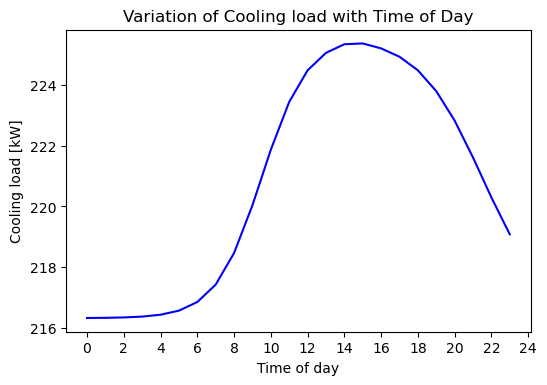

In [11]:
"Now for ploting the building load variation with Ambient Temperature which is a function of time"

varying_load = []  # Empty variable to store loads at various times

for m in range (0,24,1):
    Q_wall_1 = load_through_wall(T_amb[m]+273.15, T_in, R_eq_1)
    Q_wall_2 = load_through_wall(T_amb[m]+273.15, T_in, R_eq_2)
    Q_wall_3 = load_through_wall(T_amb[m]+273.15, T_in, R_eq_3)
    Q_wall_4 = load_through_wall(T_amb[m]+273.15, T_in, R_eq_4)
    Q_room_1 = room_load(Q_wall_1, Q_wall_2)
    Q_room_2 = room_load(Q_wall_3, Q_wall_4)
    Q_facility = Q_total(Q_room_1, Q_room_2, Q_appliances, Q_lights, Q_person)
    varying_load.append(Q_facility)

# Now ploting the graph


plt.figure(dpi = 100)
#plt.plot(Time, T_amb, color='red', label = "Amb. Temp")
plt.plot(Time, varying_load, color = 'blue', label = "")
plt.xlabel("Time of day")
plt.ylabel("Cooling load [kW]")
plt.title("Variation of Cooling load with Time of Day")
plt.locator_params(axis='x', nbins=25)
# plt.legend()
plt.show()

In [12]:
varying_load = np.array(varying_load)
print(varying_load.reshape(len(varying_load),1))

[[216.34]
 [216.34]
 [216.35]
 [216.38]
 [216.44]
 [216.58]
 [216.86]
 [217.43]
 [218.47]
 [220.04]
 [221.87]
 [223.44]
 [224.47]
 [225.05]
 [225.33]
 [225.36]
 [225.19]
 [224.92]
 [224.47]
 [223.79]
 [222.82]
 [221.61]
 [220.3 ]
 [219.09]]


In [13]:
def chiller_load (delta_temp, m_flwrate_water):
    Cp_w = 4.186    # [kW/kg.K] specific heat of water
    Q_c = m_flwrate_water * Cp_w * delta_temp
    return (Q_c)

In [14]:
" From the dataset the readings for 21st April of water through Chiller's Evaporator is entered below "
"""chiller1_delta_T = [3.3,2.8,2.8,2.7,2,2,2.1,2.6,2.9,3.1,3.1,3.3]
# readings at 2 hr interval starting at 8 hours 
m_w_1 = 13.98   # [kg/sec] mass flow rate through chiller-1

chiller2_delta_T = [1.8,1.9,2.2,2,1.7,1.7,1.9,1.6,1.7,1.8,1.8,2.6]
m_w_2 = 13.98   # [kg/sec] mass flow rate of water through chiller-2

Q_chiller_1 = []
Q_chiller_2 = []
Q_chiller_total = []

for i in range (0,12):
    Q_chill = chiller_load(chiller1_delta_T[i], m_w_1)
    Q_chiller_1.append(Q_chill)
    
    Q_chill2 = chiller_load(chiller2_delta_T[i], m_w_2)
    Q_chiller_2.append(Q_chill2)
    
    Q_tot_ch = Q_chiller_1[i] + Q_chiller_2[i]
    Q_chiller_total.append(Q_tot_ch)

print(Q_chiller_total)"""


'chiller1_delta_T = [3.3,2.8,2.8,2.7,2,2,2.1,2.6,2.9,3.1,3.1,3.3]\n# readings at 2 hr interval starting at 8 hours \nm_w_1 = 13.98   # [kg/sec] mass flow rate through chiller-1\n\nchiller2_delta_T = [1.8,1.9,2.2,2,1.7,1.7,1.9,1.6,1.7,1.8,1.8,2.6]\nm_w_2 = 13.98   # [kg/sec] mass flow rate of water through chiller-2\n\nQ_chiller_1 = []\nQ_chiller_2 = []\nQ_chiller_total = []\n\nfor i in range (0,12):\n    Q_chill = chiller_load(chiller1_delta_T[i], m_w_1)\n    Q_chiller_1.append(Q_chill)\n    \n    Q_chill2 = chiller_load(chiller2_delta_T[i], m_w_2)\n    Q_chiller_2.append(Q_chill2)\n    \n    Q_tot_ch = Q_chiller_1[i] + Q_chiller_2[i]\n    Q_chiller_total.append(Q_tot_ch)\n\nprint(Q_chiller_total)'

In [15]:
"Plotting the chiller capacity variation with time"
"""plt.figure(dpi = 100)
plt.plot(Q_chiller_total)
plt.xlabel("Time")
plt.ylabel("Chiller Capacity [kW]")
plt.title("Hourly chiller profile")
plt.xlim(0,12)
plt.show()"""

'plt.figure(dpi = 100)\nplt.plot(Q_chiller_total)\nplt.xlabel("Time")\nplt.ylabel("Chiller Capacity [kW]")\nplt.title("Hourly chiller profile")\nplt.xlim(0,12)\nplt.show()'